# Income by U.S. Census tracts in downtown Los Angeles

#### Load Python tools

In [1]:
import pandas as pd
import geopandas as gpd

/Users/stiles/.local/share/virtualenvs/notebooks-sxqKeO4C/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.max_colwidth = None

#### Read tracts data

In [3]:
src = pd.read_csv('raw/acs5_2019_householdincome_tracts.csv', dtype={'state':str, 'county':str, 'tract':str})

In [4]:
src.columns = src.columns.str.lower()

In [5]:
src.rename(columns={
    'b19001_001e': "households",
    'b19001_002e': "0_9999",
    'b19001_003e': "10000_14999",
    'b19001_004e': "15000_19999",
    'b19001_005e': "20000_24999",
    'b19001_006e': "25000_29999",
    'b19001_007e': "30000_34999",
    'b19001_008e': "35000_39999",
    'b19001_009e': "40000_44999",
    'b19001_010e': "45000_49999",
    'b19001_011e': "50000_59999",
    'b19001_012e': "60000_74999",
    'b19001_013e': "75000_99999",
    'b19001_014e': "100000_124999",
    'b19001_015e': "125000_149999",
    'b19001_016e': "150000_199999",
    'b19001_017e': "200000_more",
    'b19001_001m': "households_error",
    'b19001_002m': "0_9999_error",
    'b19001_003m': "10000_14999_error",
    'b19001_004m': "15000_19999_error",
    'b19001_005m': "20000_24999_error",
    'b19001_006m': "25000_29999_error",
    'b19001_007m': "30000_34999_error",
    'b19001_008m': "35000_39999_error",
    'b19001_009m': "40000_44999_error",
    'b19001_010m': "45000_49999_error",
    'b19001_011m': "50000_59999_error",
    'b19001_012m': "60000_74999_error",
    'b19001_013m': "75000_99999_error",
    'b19001_014m': "100000_124999_error",
    'b19001_015m': "125000_149999_error",
    'b19001_016m': "150000_199999_error",
    'b19001_017m': "200000_more_error"
}, inplace=True)

In [6]:
src_slim = src[[
    'geo_id',
    'state',
    'county',
    'tract',
    "name",
    "households",
    "0_9999",
    "10000_14999",
    "15000_19999",
    "20000_24999",
    "25000_29999",
    "30000_34999",
    "35000_39999",
    "40000_44999",
    "45000_49999",
    "50000_59999",
    "60000_74999",
    "75000_99999",
    "100000_124999",
    "125000_149999",
    "150000_199999",
    "200000_more",
    "households_error",
    "0_9999_error",
    "10000_14999_error",
    "15000_19999_error",
    "20000_24999_error",
    "25000_29999_error",
    "30000_34999_error",
    "35000_39999_error",
    "40000_44999_error",
    "45000_49999_error",
    "50000_59999_error",
    "60000_74999_error",
    "75000_99999_error",
    "100000_124999_error",
    "125000_149999_error",
    "150000_199999_error",
    "200000_more_error",
]]

#### Just Los Angeles

In [7]:
la_tracts = src_slim[src_slim['name'].str.contains('Los Angeles County, California')]

In [8]:
la_tracts.columns

Index(['geo_id', 'state', 'county', 'tract', 'name', 'households', '0_9999',
       '10000_14999', '15000_19999', '20000_24999', '25000_29999',
       '30000_34999', '35000_39999', '40000_44999', '45000_49999',
       '50000_59999', '60000_74999', '75000_99999', '100000_124999',
       '125000_149999', '150000_199999', '200000_more', 'households_error',
       '0_9999_error', '10000_14999_error', '15000_19999_error',
       '20000_24999_error', '25000_29999_error', '30000_34999_error',
       '35000_39999_error', '40000_44999_error', '45000_49999_error',
       '50000_59999_error', '60000_74999_error', '75000_99999_error',
       '100000_124999_error', '125000_149999_error', '150000_199999_error',
       '200000_more_error'],
      dtype='object')

In [9]:
la_tracts.head()

,geo_id,state,county,tract,name,households,0_9999,10000_14999,15000_19999,20000_24999,25000_29999,30000_34999,35000_39999,40000_44999,45000_49999,50000_59999,60000_74999,75000_99999,100000_124999,125000_149999,150000_199999,200000_more,households_error,0_9999_error,10000_14999_error,15000_19999_error,20000_24999_error,25000_29999_error,30000_34999_error,35000_39999_error,40000_44999_error,45000_49999_error,50000_59999_error,60000_74999_error,75000_99999_error,100000_124999_error,125000_149999_error,150000_199999_error,200000_more_error
4731,1400000US06037101110,06,037,101110,"Census Tract 1011.10, Los Angeles County, California",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,90.0,71.0,65.0,68.0,41.0,45.0,67.0,56.0,37.0,53.0,56.0,56.0,103.0,60.0,48.0,73.0,40.0
4732,1400000US06037101122,06,037,101122,"Census Tract 1011.22, Los Angeles County, California",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,63.0,52.0,22.0,12.0,48.0,43.0,27.0,11.0,12.0,52.0,25.0,90.0,116.0,63.0,73.0,55.0,74.0
4733,1400000US06037101210,06,037,101210,"Census Tract 1012.10, Los Angeles County, California",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,98.0,127.0,69.0,112.0,41.0,76.0,109.0,74.0,47.0,96.0,78.0,79.0,119.0,96.0,65.0,51.0,59.0
4734,1400000US06037101220,06,037,101220,"Census Tract 1012.20, Los Angeles County, California",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,57.0,53.0,59.0,64.0,41.0,31.0,53.0,42.0,56.0,56.0,43.0,35.0,59.0,51.0,44.0,47.0,32.0
4735,1400000US06037101300,06,037,101300,"Census Tract 1013, Los Angeles County, California",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,93.0,50.0,19.0,60.0,26.0,48.0,42.0,19.0,56.0,26.0,50.0,65.0,71.0,59.0,47.0,72.0,77.0


---

## Geography

#### LA County tracts

In [10]:
tracts_gdf = gpd.read_file('geo/processed/la_county_tracts.geojson')

<AxesSubplot:>

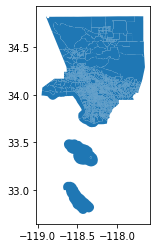

In [11]:
tracts_gdf.plot()

#### Reproject tracts

In [12]:
tracts_gdf = tracts_gdf.to_crs("EPSG:4326")

In [13]:
tracts_gdf.columns = tracts_gdf.columns.str.lower()

#### City of Los Angeles neighborhoods

In [14]:
neighborhoods = gpd.read_file('geo/processed/la-neighborhoods.geojson')

<AxesSubplot:>

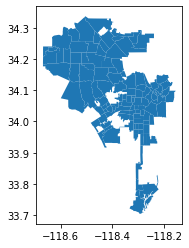

In [15]:
neighborhoods.plot()

In [16]:
neighborhoods.columns = neighborhoods.columns.str.lower()

#### Just the Downtown area

In [17]:
downtown_gdf = neighborhoods[neighborhoods['name'] == 'Downtown']

<AxesSubplot:>

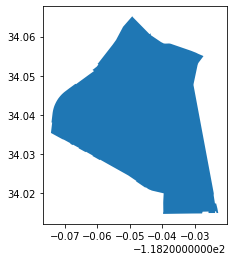

In [18]:
downtown_gdf.plot()

#### Reproject downtown

In [19]:
downtown_gdf = downtown_gdf.to_crs("EPSG:4326")

---

## Just downtown tracts

#### First, merge the countywide tracts income values to tracts geo

In [20]:
la_income_tracts_gdf = pd.merge(tracts_gdf, la_tracts, left_on='tractce10', right_on='tract')

In [21]:
len(la_income_tracts_gdf)

2345

#### Now, use a spatial join to grab only those around downtown

In [22]:
income_tracts_inside_downtown_gdf = gpd.sjoin(la_income_tracts_gdf, downtown_gdf, predicate='within')
income_tracts_around_downtown_gdf = gpd.sjoin(la_income_tracts_gdf, downtown_gdf, predicate='overlaps')

In [23]:
len(income_tracts_inside_downtown_gdf)

11

#### Tracts within Downtown

<AxesSubplot:>

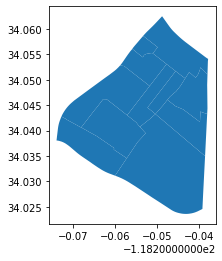

In [24]:
income_tracts_inside_downtown_gdf.plot()

#### Tracts contiguous to Downtown

<AxesSubplot:>

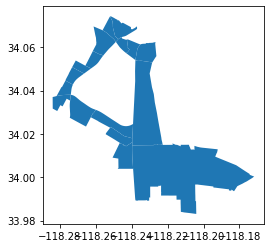

In [25]:
income_tracts_around_downtown_gdf.plot()

#### Both together in one geodataframe

In [26]:
income_tracts_in_around_downtown_gdf = gpd.GeoDataFrame( pd.concat([income_tracts_inside_downtown_gdf, income_tracts_around_downtown_gdf], ignore_index=True) )

<AxesSubplot:>

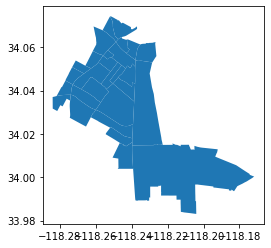

In [27]:
income_tracts_in_around_downtown_gdf.plot()

In [28]:
income_tracts_in_around_downtown_gdf.drop(['geometry'], axis=1).to_csv('../../usc/students/gharmon/income_tracts_in_around_downtown.csv', index=False)

In [29]:
income_tracts_in_around_downtown_gdf.to_file('../../usc/students/gharmon/income_tracts_in_around_downtown.geojson', driver='GeoJSON')